In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Creating the dataFrame

In [4]:
dataSet = pd.read_csv('./../dataSet/Dataset_spine.csv')

dataSet.drop([dataSet.keys()[-1]], axis=1, inplace=True)
dataSet['target'] = dataSet['class'].apply(lambda x: 0 if x == 'Abnormal' else 1)
dataSet.insert(0,"Line", range(310),True)
dataSet

,Line,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class,target
0,0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,0
1,1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,0
2,2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,0
3,3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,0
4,4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal,1
306,306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal,1
307,307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal,1
308,308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal,1


# Creating the train and test arrays

In [5]:
y = dataSet.target
y

0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    1
307    1
308    1
309    1
Name: target, Length: 310, dtype: int64

In [6]:
X = pd.DataFrame(
        dataSet.drop(axis=1, labels=['class', 'target']),
        columns=dataSet.columns[:-2])
scaler_model = StandardScaler()
X = scaler_model.fit_transform(X)
X

array([[-1.72647253,  0.14708636,  0.50136873, ...,  1.1671291 ,
        -1.19658726,  1.71236843],
       [-1.71529795, -1.24586434, -0.74876898, ...,  1.67955123,
        -0.94032533, -0.91394145],
       [-1.70412337,  0.4843695 ,  0.46793218, ...,  1.63596949,
        -1.22717809, -0.61568643],
       ...,
       [ 1.70412337,  0.05520137,  0.51561812, ..., -1.05158278,
         1.44337397, -0.69303204],
       [ 1.71529795, -0.88582307, -0.88565951, ..., -0.75264852,
         1.62384854,  0.77376463],
       [ 1.72647253, -1.54892681, -1.24785954, ...,  0.62174631,
         1.29742294,  1.43371339]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# Function to analyze the Classifier

In [39]:
def analyze(classifier):
    plt.plot(classifier.loss_curve_)
    plt.grid()
    plt.show()

    y_pred = classifier.predict(X_test)

    confMatrix = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(
        pd.DataFrame(confMatrix),
        annot=True
    )
    plt.title("Confusion Matrix")
    plt.ylabel("Right Label")
    plt.xlabel("Predicted Label")
    

    return {'Score': classifier.score(X_test, y_test), 'Params': classifier.get_params()}
    

# Number of Epochs Influence

## Model 1.1

In [35]:
model1_1 = MLPClassifier(random_state=1, max_iter=20)
model1_1.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=20)

### Analyzing the Classifier

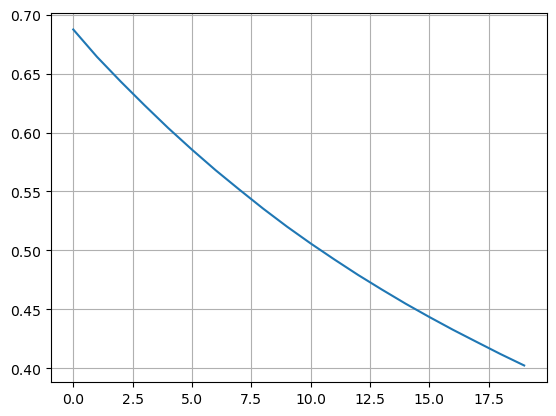

{'Score': 0.9487179487179487,
 'Params': {'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (100,),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_fun': 15000,
  'max_iter': 20,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': None,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False}}

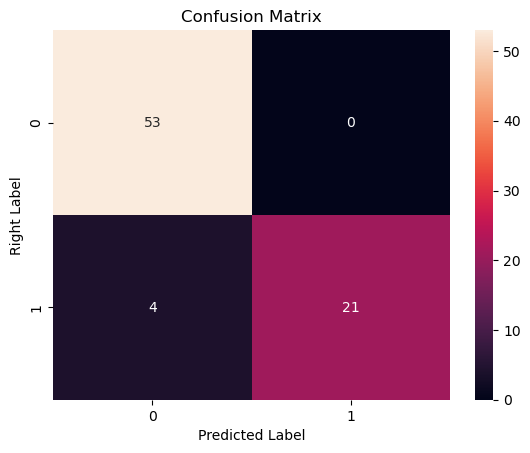

In [40]:
analyze(model1_1)

## Second MLP classifier

In [37]:
model1_2 = MLPClassifier(random_state=1, max_iter=50)
model1_2.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=50)

### Analyzing the Classifier

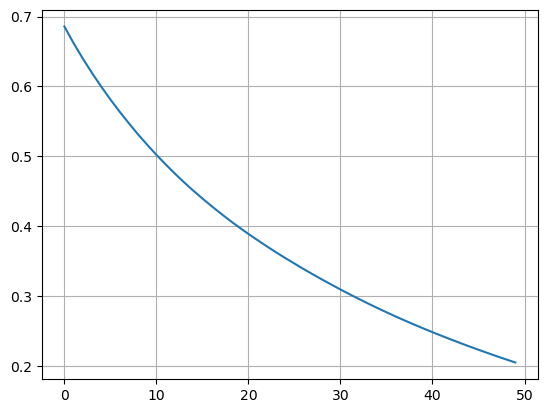

{'Score': 0.9615384615384616,
 'Params': {'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (100,),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_fun': 15000,
  'max_iter': 50,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': None,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False}}

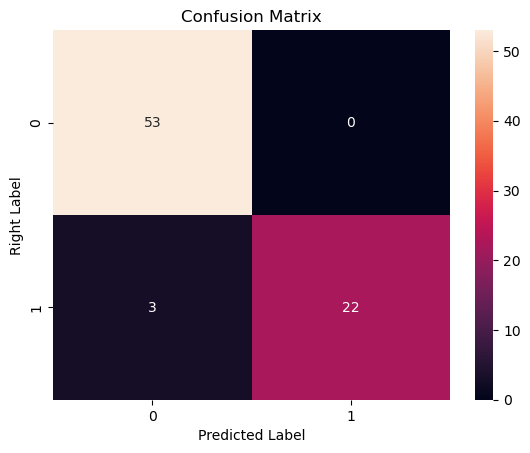

In [41]:
analyze(model1_2)

## Third MLP classifier

In [42]:
model1_3 = MLPClassifier(random_state=1, max_iter=200)
model1_3.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

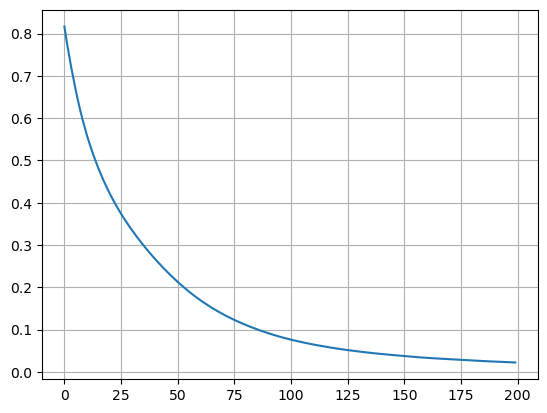

{'Score': 0.9871794871794872,
 'Params': {'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (100,),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_fun': 15000,
  'max_iter': 200,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': None,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False}}

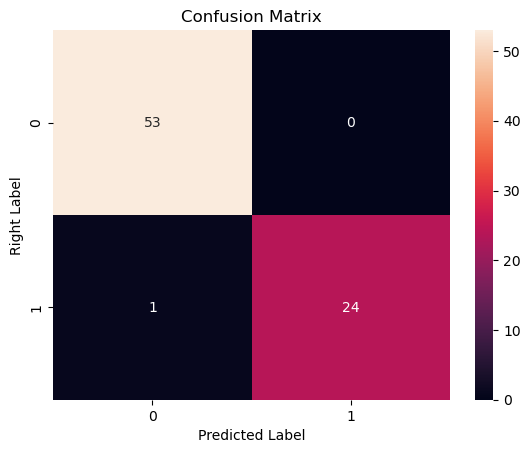

In [43]:
analyze(model1_3)

# Activation Function Influence

## Model 2.1

In [45]:
model2_1 = MLPClassifier(random_state=1, activation='logistic')
model2_1.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic')

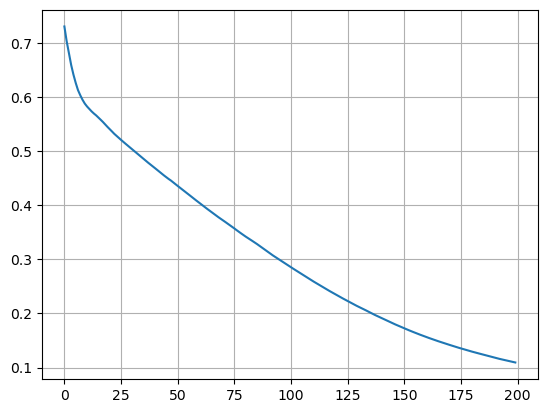

{'Score': 0.9871794871794872,
 'Params': {'activation': 'logistic',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (100,),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_fun': 15000,
  'max_iter': 200,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': None,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False}}

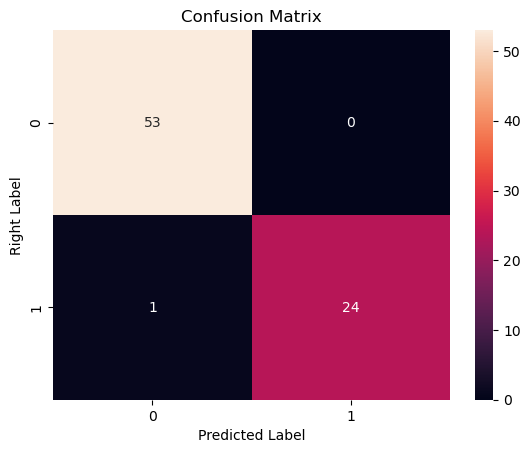

In [46]:
analyze(model2_1)

## Model 2.2

In [47]:
model2_2 = MLPClassifier(random_state=1, activation='tanh')
model2_2.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh')

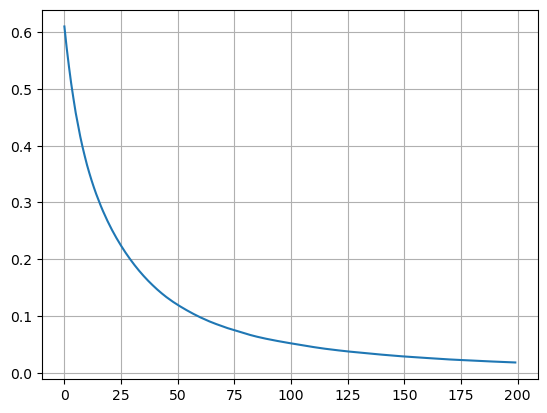

{'Score': 1.0,
 'Params': {'activation': 'tanh',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (100,),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_fun': 15000,
  'max_iter': 200,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': None,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False}}

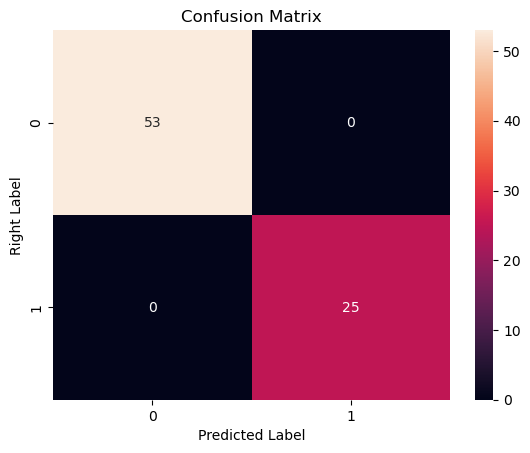

In [48]:
analyze(model2_2)

## Model 2.3

In [49]:
model2_3 = MLPClassifier(random_state=1, activation='identity')
model2_3.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='identity')

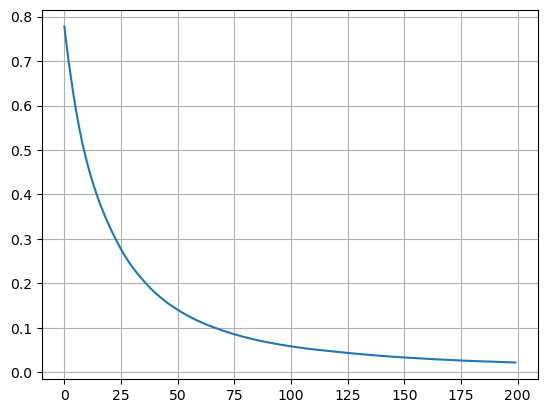

{'Score': 1.0,
 'Params': {'activation': 'identity',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (100,),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_fun': 15000,
  'max_iter': 200,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': None,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False}}

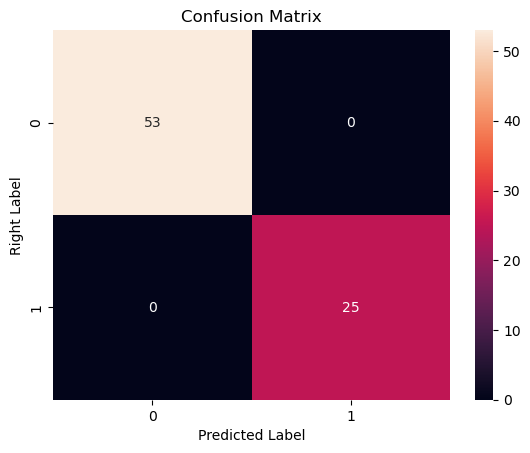

In [50]:
analyze(model2_3)

# Hidden Layers Size Influence

## Model 3.1

In [51]:
model3_1 = MLPClassifier(random_state=1, hidden_layer_sizes=(10,))
model3_1.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), random_state=1)

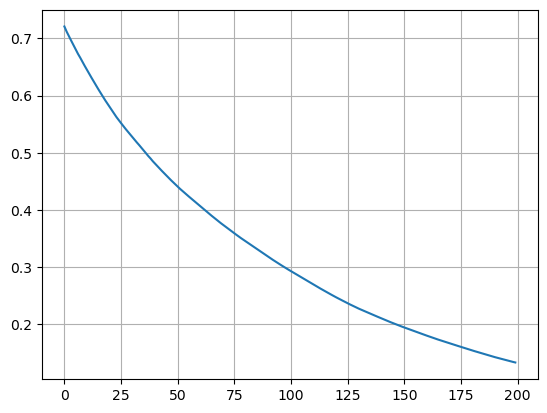

{'Score': 0.9487179487179487,
 'Params': {'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (10,),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_fun': 15000,
  'max_iter': 200,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': 1,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False}}

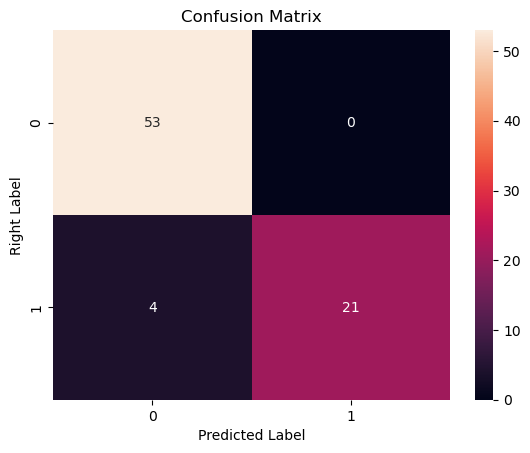

In [52]:
analyze(model3_1)

## Model 3.2

In [53]:
model3_2 = MLPClassifier(random_state=1, hidden_layer_sizes=(50,))
model3_2.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), random_state=1)

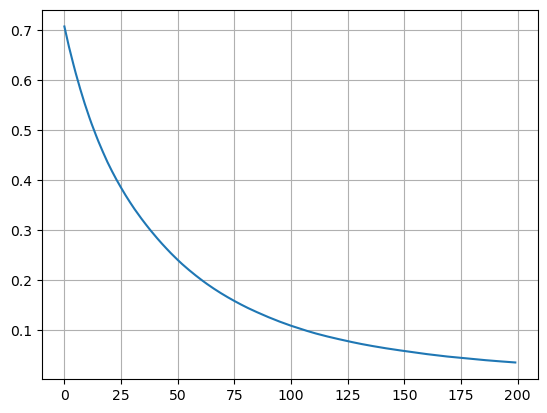

{'Score': 0.9871794871794872,
 'Params': {'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (50,),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_fun': 15000,
  'max_iter': 200,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': 1,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False}}

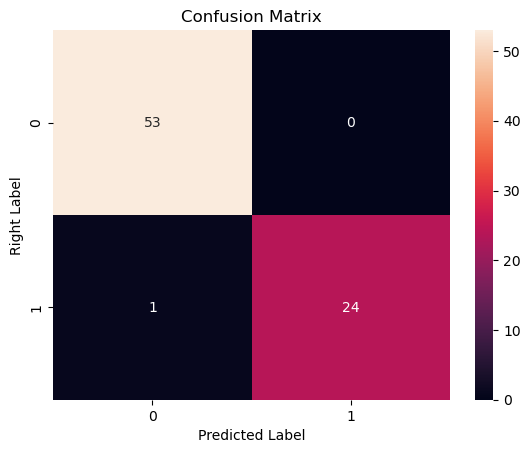

In [54]:
analyze(model3_2)

## Model 3.3

In [55]:
model3_3 = MLPClassifier(random_state=1, hidden_layer_sizes=(200,))
model3_3.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(200,), random_state=1)

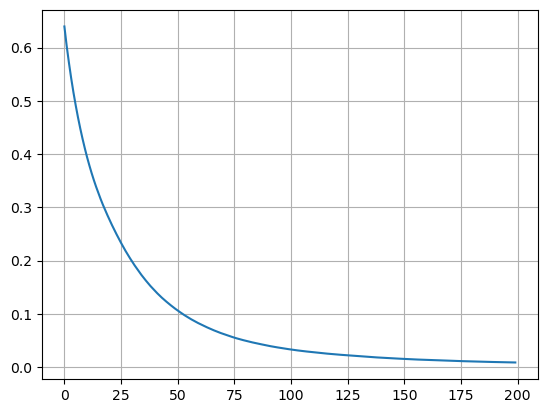

{'Score': 0.9871794871794872,
 'Params': {'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (200,),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_fun': 15000,
  'max_iter': 200,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': 1,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False}}

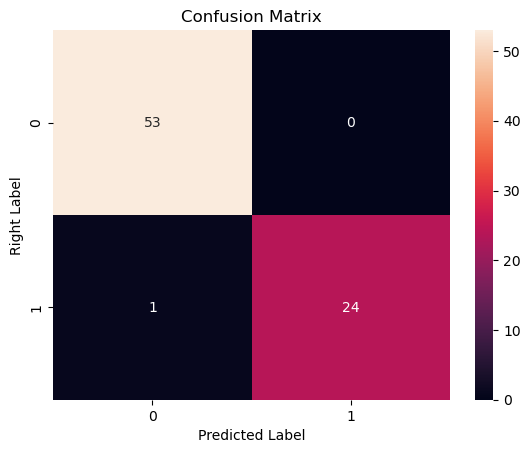

In [66]:
analyze(model3_3)

# Solver Influence

## Model 4.1

In [72]:
model4_1 = MLPClassifier(random_state=1, solver='sgd')
model4_1.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=1, solver='sgd')

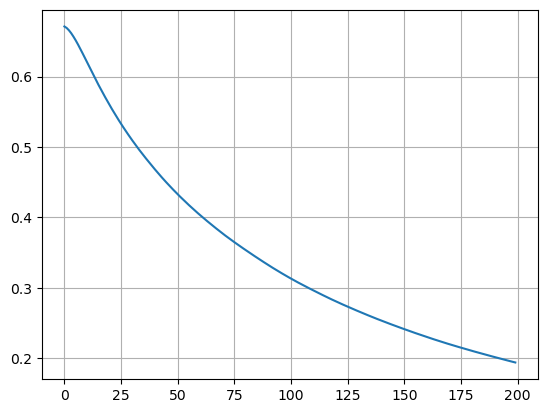

{'Score': 0.9743589743589743,
 'Params': {'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (100,),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_fun': 15000,
  'max_iter': 200,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': 1,
  'shuffle': True,
  'solver': 'sgd',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False}}

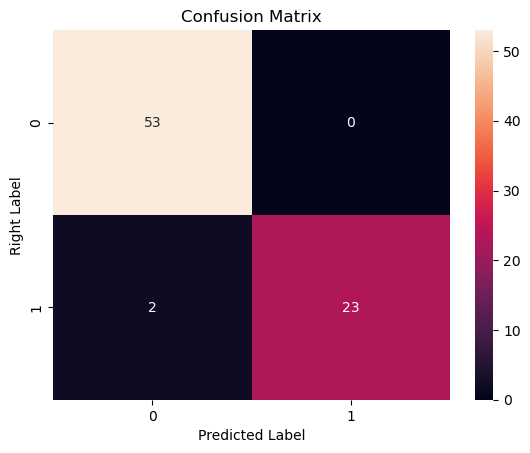

In [73]:
analyze(model4_1)

# Initial Learning Rate Influence

## Model 5.1

In [78]:
model5_1 = MLPClassifier(random_state=1, learning_rate_init=0.2)
model5_1.fit(X_train, y_train)

MLPClassifier(learning_rate_init=0.2, random_state=1)

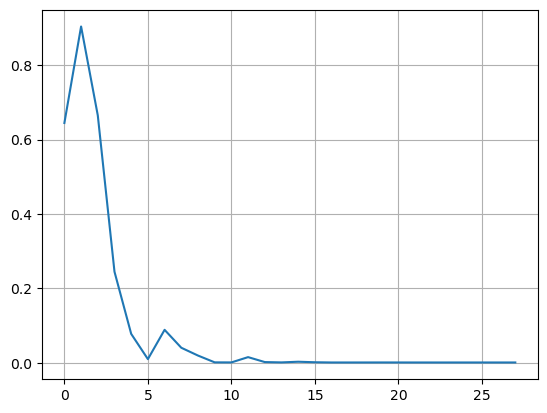

{'Score': 0.9743589743589743,
 'Params': {'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (100,),
  'learning_rate': 'constant',
  'learning_rate_init': 0.2,
  'max_fun': 15000,
  'max_iter': 200,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': 1,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False}}

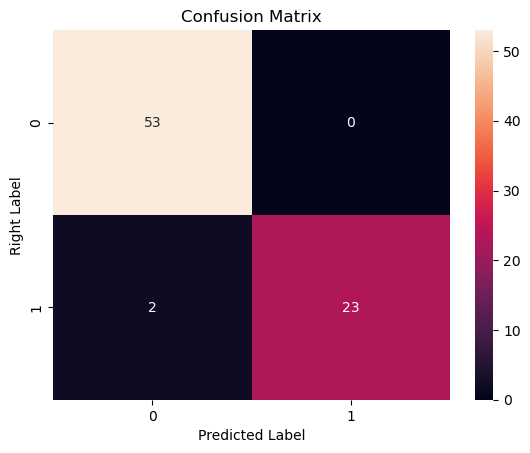

In [79]:
analyze(model5_1)